In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 123s 11us/step


In [6]:
import matplotlib.pyplot as plt

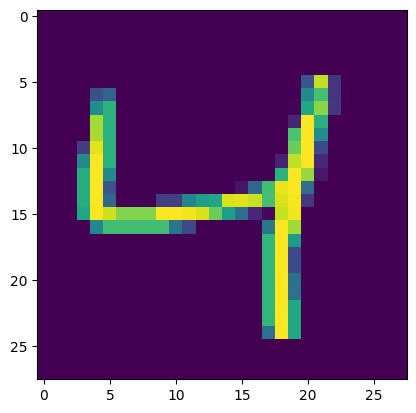

In [10]:
plt.imshow(X_train[2])

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
model = Sequential()

In [14]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 17s 8ms/step - loss: 0.2833 - accuracy: 0.9164 - val_loss: 0.1412 - val_accuracy: 0.9582
Epoch 2/25
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1190 - accuracy: 0.9635 - val_loss: 0.1333 - val_accuracy: 0.9600
Epoch 3/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0835 - accuracy: 0.9745 - val_loss: 0.1022 - val_accuracy: 0.9695
Epoch 4/25
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0639 - accuracy: 0.9800 - val_loss: 0.0954 - val_accuracy: 0.9706
Epoch 5/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0487 - accuracy: 0.9844 - val_loss: 0.1042 - val_accuracy: 0.9700
Epoch 6/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0395 - accuracy: 0.9874 - val_loss: 0.0947 - val_accuracy: 0.9734
Epoch 7/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.1180 - val_ac

In [18]:
y_prob = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [19]:
y_pred = y_prob.argmax(axis=1)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test,y_pred)

0.9767

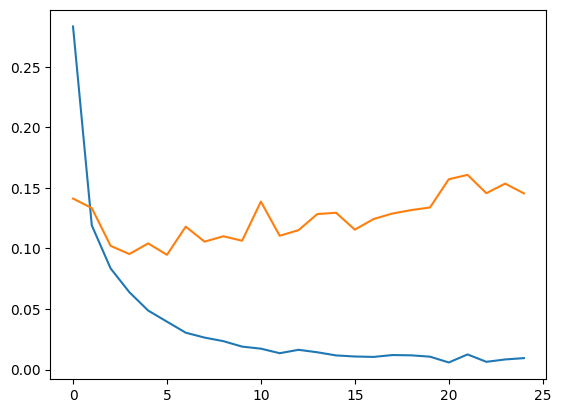

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

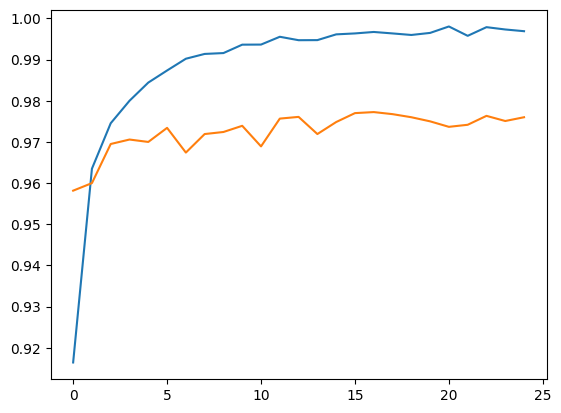

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

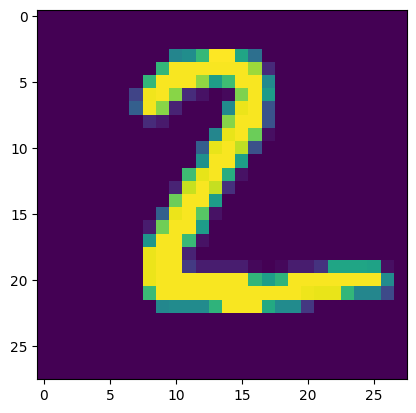

In [27]:
plt.imshow(X_test[1])

In [29]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 50ms/step


array([2], dtype=int64)